# CAR DATASET CLEANING

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

To read csv file to the editor


In [2]:
dataset = pd.read_csv(r"C:\Users\SACHIN\OneDrive\Desktop\Data cleaning\cardataset.csv", encoding='ISO-8859-1')
dataset.head(10)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,NaN,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,NaN,NaN,Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",NaN,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm
5,BMW,Mclaren 720s,V8,"3,994 cc",710 hp,341 km/h,2.9 sec,"$499,000",Petrol,2,770 Nm
6,ASTON MARTIN,VANTAGE F1,V8,"3,982 cc",656 hp,314 km/h,3.6 sec,"$193,440",Petrol,2,685 Nm
7,BENTLEY,Continental GT Azure,V8,NaN,NaN,318 km/h,4.0 sec,"$311,000",Petrol,4,900 Nm
8,LAMBORGHINI,VENENO ROADSTER,NaN,"6,498 cc",750 hp,356 km/h,NaN,"$4,500,000",Petrol,2,690 Nm
9,FERRARI,NaN,V8,"3,900 cc",710 hp,340 km/h,2.9 sec,"$280,000",Petrol,2,770 Nm


To get the no. of rows and columns 

In [3]:
dataset.shape

(1218, 11)

Extracting the missing values in the dataset.

In [4]:
dataset.isnull().sum()

Company Names                 1
Cars Names                    4
Engines                       5
CC/Battery Capacity          11
HorsePower                    9
Total Speed                   5
Performance(0 - 100 )KM/H    17
Cars Prices                  12
Fuel Types                    7
Seats                         6
Torque                        4
dtype: int64

Percentage of missing values in each column data.

In [5]:
((dataset.isnull().sum())/(dataset.shape[0]))*100

Company Names                0.082102
Cars Names                   0.328407
Engines                      0.410509
CC/Battery Capacity          0.903120
HorsePower                   0.738916
Total Speed                  0.410509
Performance(0 - 100 )KM/H    1.395731
Cars Prices                  0.985222
Fuel Types                   0.574713
Seats                        0.492611
Torque                       0.328407
dtype: float64

Total missing values in the dataset.

In [6]:
dataset.isnull().sum().sum()

np.int64(81)

A graph plot for identifying the missing values of each column in the dataset.

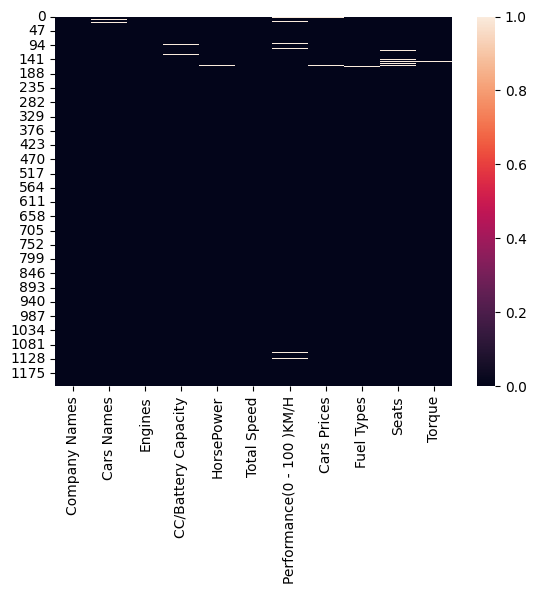

In [7]:
sns.heatmap(dataset.isnull())
plt.show()

Total percentage of missing values in the dataset.

In [8]:
((dataset.isnull().sum().sum())/(dataset.shape[0]*dataset.shape[1]))*100

np.float64(0.6045678459471563)

To identify the datatypes of the column data.

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1217 non-null   object
 1   Cars Names                 1214 non-null   object
 2   Engines                    1213 non-null   object
 3   CC/Battery Capacity        1207 non-null   object
 4   HorsePower                 1209 non-null   object
 5   Total Speed                1213 non-null   object
 6   Performance(0 - 100 )KM/H  1201 non-null   object
 7   Cars Prices                1206 non-null   object
 8   Fuel Types                 1211 non-null   object
 9   Seats                      1212 non-null   object
 10  Torque                     1214 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [10]:
dataset.head(5)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,NaN,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,NaN,NaN,Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",NaN,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


To convert object data to numeric data for handling data in our convenient manner.

In [11]:
target_columns = ['CC/Battery Capacity','HorsePower','Total Speed','Performance(0 - 100 )KM/H','Cars Prices','Seats','Torque']
for col in target_columns:
    dataset[col] = dataset[col].astype(str) \
                     .str.replace(r'[^0-9.]', '', regex=True) \
                     .replace('', '0')  

    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

In [12]:
dataset.head(10)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990.0,963.0,340.0,2.5,1100000,plug in hyrbrid,2,800
1,ROLLS ROYCE,PHANTOM,V12,0.0,563.0,250.0,5.3,460000,Petrol,5,900
2,Ford,KA+,1.2L Petrol,1200.0,7085.0,165.0,10.5,1200015000,Petrol,5,100140
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,0.0,0,Petrol,4,900
4,AUDI,AUDI R8 Gt,V10,5204.0,0.0,320.0,3.6,253290,Petrol,2,560
5,BMW,Mclaren 720s,V8,3994.0,710.0,341.0,2.9,499000,Petrol,2,770
6,ASTON MARTIN,VANTAGE F1,V8,3982.0,656.0,314.0,3.6,193440,Petrol,2,685
7,BENTLEY,Continental GT Azure,V8,0.0,0.0,318.0,4.0,311000,Petrol,4,900
8,LAMBORGHINI,VENENO ROADSTER,NaN,6498.0,750.0,356.0,0.0,4500000,Petrol,2,690
9,FERRARI,NaN,V8,3900.0,710.0,340.0,2.9,280000,Petrol,2,770


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Names              1217 non-null   object 
 1   Cars Names                 1214 non-null   object 
 2   Engines                    1213 non-null   object 
 3   CC/Battery Capacity        1216 non-null   float64
 4   HorsePower                 1218 non-null   float64
 5   Total Speed                1218 non-null   float64
 6   Performance(0 - 100 )KM/H  1208 non-null   float64
 7   Cars Prices                1218 non-null   int64  
 8   Fuel Types                 1211 non-null   object 
 9   Seats                      1218 non-null   int64  
 10  Torque                     1218 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 104.8+ KB


To fill data in object datatype :- 

In [14]:
for i in dataset.select_dtypes(include="object").columns :
    dataset[i] = dataset[i].fillna(dataset[i].mode()[0])

In [15]:
dataset.isnull().sum()

Company Names                 0
Cars Names                    0
Engines                       0
CC/Battery Capacity           2
HorsePower                    0
Total Speed                   0
Performance(0 - 100 )KM/H    10
Cars Prices                   0
Fuel Types                    0
Seats                         0
Torque                        0
dtype: int64

Only two columns have missing values. We select only those columns for operation.

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Names              1218 non-null   object 
 1   Cars Names                 1218 non-null   object 
 2   Engines                    1218 non-null   object 
 3   CC/Battery Capacity        1216 non-null   float64
 4   HorsePower                 1218 non-null   float64
 5   Total Speed                1218 non-null   float64
 6   Performance(0 - 100 )KM/H  1208 non-null   float64
 7   Cars Prices                1218 non-null   int64  
 8   Fuel Types                 1218 non-null   object 
 9   Seats                      1218 non-null   int64  
 10  Torque                     1218 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 104.8+ KB


In [17]:
dataset.select_dtypes(include="float64").columns

Index(['CC/Battery Capacity', 'HorsePower', 'Total Speed',
       'Performance(0 - 100 )KM/H'],
      dtype='object')

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
si=SimpleImputer(strategy="mean")
ar=si.fit_transform(dataset[['CC/Battery Capacity','Performance(0 - 100 )KM/H']])

In [20]:
new_df = pd.DataFrame(ar)
new_df.columns=['CC/Battery Capacity','Performance(0 - 100 )KM/H']

In [21]:
new_df.isnull().sum()

CC/Battery Capacity          0
Performance(0 - 100 )KM/H    0
dtype: int64

Update these datas to the old dataset

In [22]:
dataset.update(new_df)

We check whether all the missing values are encountered.

In [23]:
dataset.isnull().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          0
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    0
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       0
dtype: int64

Therefore, we encountered all the missing values in the dataset.

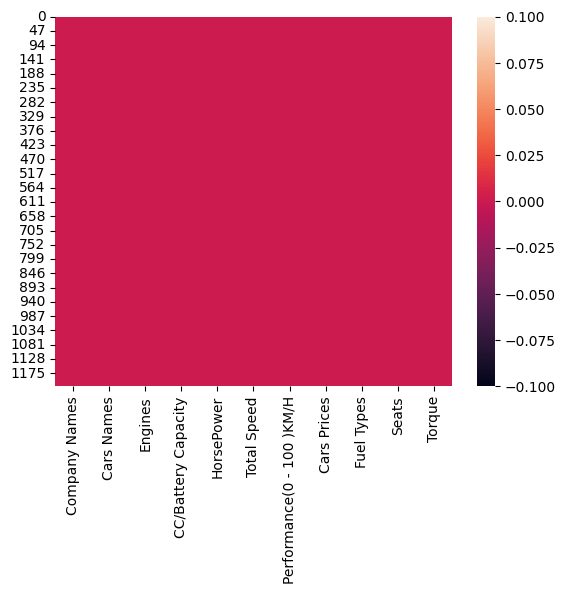

In [24]:
sns.heatmap(dataset.isnull())
plt.show()

To remove outliers.

In [25]:
dataset.describe()

,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Seats,Torque
count,1.218000e+03,1218.000000,1218.000000,1218.000000,1.218000e+03,1218.000000,1.218000e+03
mean,1.569545e+07,11296.664204,215.465517,7.489901,4.140209e+10,5.381773,2.027518e+04
std,1.714261e+08,45530.550590,54.766653,3.403731,1.432661e+12,8.990796,3.635572e+05
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.591000e+03,164.250000,180.000000,5.200000,3.262500e+04,4.000000,2.500000e+02
50%,2.488000e+03,285.000000,200.000000,7.100000,5.385000e+04,5.000000,3.810000e+02
75%,3.996000e+03,450.000000,250.000000,9.500000,1.420000e+05,5.000000,5.800000e+02
max,1.999430e+09,450475.000000,500.000000,35.000000,5.000001e+13,215.000000,1.050120e+07


To remove outliers using "quantile".

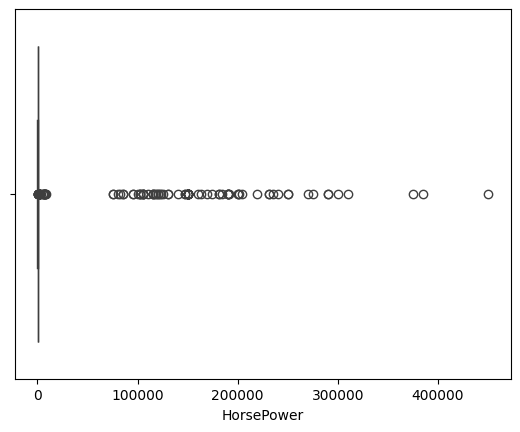

In [26]:
sns.boxplot(x="HorsePower",data=dataset)
plt.show()

In [27]:
q1=dataset["HorsePower"].quantile(0.25)
q2=dataset["HorsePower"].quantile(0.75)

In [28]:
IQR=q2-q1

In [29]:
min_range=q1-(1.5*IQR)
max_range=q2+(1.5*IQR)
min_range,max_range

(np.float64(-264.375), np.float64(878.625))

In [30]:
new_data=dataset[dataset["HorsePower"]<=max_range]

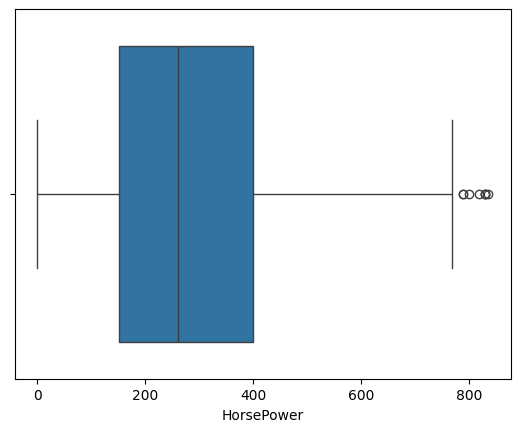

In [31]:
sns.boxplot(x="HorsePower",data=new_data)
plt.show()

To remove outliers using "z-score" and "direct method".

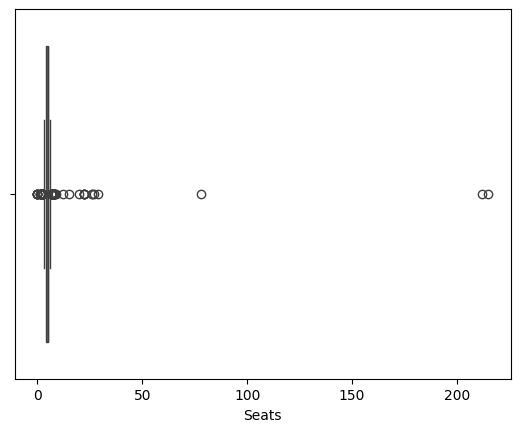

In [32]:
sns.boxplot(x="Seats",data=dataset)
plt.show()

z-score method.

In [33]:
z_score=(dataset["Seats"]-dataset["Seats"].mean())/(dataset["Seats"].std())

In [34]:
dataset["z_score"]=z_score

In [35]:
dataset[dataset["Seats"]<3]

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,z_score
0,FERRARI,SF90 STRADALE,V8,3990.0,963.0,340.0,2.5,1100000,plug in hyrbrid,2,800,-0.376137
4,AUDI,AUDI R8 Gt,V10,5204.0,0.0,320.0,3.6,253290,Petrol,2,560,-0.376137
5,BMW,Mclaren 720s,V8,3994.0,710.0,341.0,2.9,499000,Petrol,2,770,-0.376137
6,ASTON MARTIN,VANTAGE F1,V8,3982.0,656.0,314.0,3.6,193440,Petrol,2,685,-0.376137
8,LAMBORGHINI,VENENO ROADSTER,I4,6498.0,750.0,356.0,0.0,4500000,Petrol,2,690,-0.376137
...,...,...,...,...,...,...,...,...,...,...,...,...
1204,Mazda,Porter,1.5L Inline-4,1497.0,95.0,130.0,14.0,1200015000,Petrol,2,130,-0.376137
1206,Mazda,MX-5 Superlight Concept,1.8L Inline-4,1798.0,143.0,200.0,7.5,3000035000,Petrol,2,160,-0.376137
1208,Mazda,Bongo Truck,2.0L Inline-4,1998.0,120.0,130.0,15.0,1500018000,Petrol,2,150,-0.376137
1209,Mazda,Rotary Pickup,1.3L Wankel Rotary Engine,1308.0,130.0,150.0,14.5,1800022000,Petrol,2,160,-0.376137


Direct method.

In [36]:
min_range=dataset["Seats"].mean()-(3*dataset["Seats"].std())
max_range=dataset["Seats"].mean()+(3*dataset["Seats"].std())
min_range,max_range

(np.float64(-21.590613928836238), np.float64(32.35416072686579))

In [37]:
new_data1=dataset[dataset["Seats"]<=max_range]

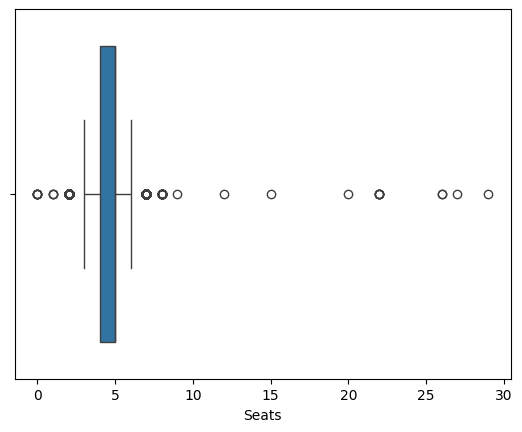

In [38]:
sns.boxplot(x="Seats",data=new_data1)
plt.show()

Here, direct method and z-score method gives exactly same result. For a better understanding, we used direct method for graph plotting.

In [39]:
dataset.describe()

,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Seats,Torque,z_score
count,1.218000e+03,1218.000000,1218.000000,1218.000000,1.218000e+03,1218.000000,1.218000e+03,1.218000e+03
mean,1.569545e+07,11296.664204,215.465517,7.489901,4.140209e+10,5.381773,2.027518e+04,-2.333474e-17
std,1.714261e+08,45530.550590,54.766653,3.403731,1.432661e+12,8.990796,3.635572e+05,1.000000e+00
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,-5.985870e-01
25%,1.591000e+03,164.250000,180.000000,5.200000,3.262500e+04,4.000000,2.500000e+02,-1.536876e-01
50%,2.488000e+03,285.000000,200.000000,7.100000,5.385000e+04,5.000000,3.810000e+02,-4.246269e-02
75%,3.996000e+03,450.000000,250.000000,9.500000,1.420000e+05,5.000000,5.800000e+02,-4.246269e-02
max,1.999430e+09,450475.000000,500.000000,35.000000,5.000001e+13,215.000000,1.050120e+07,2.331476e+01


Standardization.

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
ss=StandardScaler()
dataset["Total Speed_ss"]=pd.DataFrame(ss.fit_transform(dataset[["Total Speed"]]),columns=["x"])

In [42]:
dataset.head(5)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,z_score,Total Speed_ss
0,FERRARI,SF90 STRADALE,V8,3990.0,963.0,340.0,2.5,1100000,plug in hyrbrid,2,800,-0.376137,2.274845
1,ROLLS ROYCE,PHANTOM,V12,0.0,563.0,250.0,5.3,460000,Petrol,5,900,-0.042463,0.630834
2,Ford,KA+,1.2L Petrol,1200.0,7085.0,165.0,10.5,1200015000,Petrol,5,100140,-0.042463,-0.921843
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,0.0,0,Petrol,4,900,-0.153688,0.630834
4,AUDI,AUDI R8 Gt,V10,5204.0,0.0,320.0,3.6,253290,Petrol,2,560,-0.376137,1.909509


C:\Users\SACHIN\AppData\Local\Temp\ipykernel_20080\1260947012.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Total Speed"])
C:\Users\SACHIN\AppData\Local\Temp\ipykernel_20080\1260947012.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Total Speed_ss"])


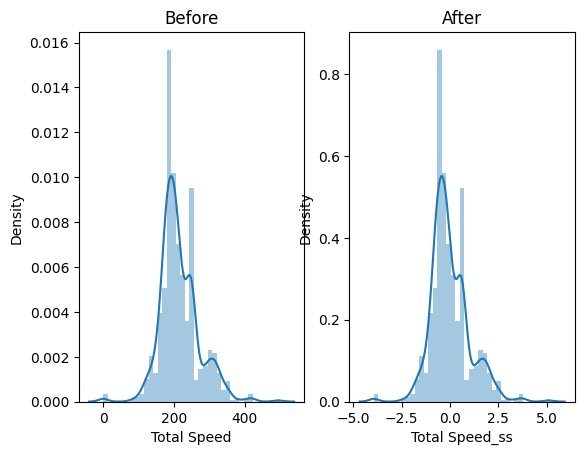

In [43]:
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["Total Speed"])
plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["Total Speed_ss"])
plt.show()

Normalization.

In [44]:
dataset.head(3)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,z_score,Total Speed_ss
0,FERRARI,SF90 STRADALE,V8,3990.0,963.0,340.0,2.5,1100000,plug in hyrbrid,2,800,-0.376137,2.274845
1,ROLLS ROYCE,PHANTOM,V12,0.0,563.0,250.0,5.3,460000,Petrol,5,900,-0.042463,0.630834
2,Ford,KA+,1.2L Petrol,1200.0,7085.0,165.0,10.5,1200015000,Petrol,5,100140,-0.042463,-0.921843


In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
ss=MinMaxScaler()
dataset["CC/Battery Capacity_ss"]=pd.DataFrame(ss.fit_transform(dataset[["CC/Battery Capacity"]]),columns=["x"])

In [47]:
dataset.head(5)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,z_score,Total Speed_ss,CC/Battery Capacity_ss
0,FERRARI,SF90 STRADALE,V8,3990.0,963.0,340.0,2.5,1100000,plug in hyrbrid,2,800,-0.376137,2.274845,1.995569e-06
1,ROLLS ROYCE,PHANTOM,V12,0.0,563.0,250.0,5.3,460000,Petrol,5,900,-0.042463,0.630834,0.000000e+00
2,Ford,KA+,1.2L Petrol,1200.0,7085.0,165.0,10.5,1200015000,Petrol,5,100140,-0.042463,-0.921843,6.001711e-07
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,0.0,0,Petrol,4,900,-0.153688,0.630834,1.991568e-06
4,AUDI,AUDI R8 Gt,V10,5204.0,0.0,320.0,3.6,253290,Petrol,2,560,-0.376137,1.909509,2.602742e-06


C:\Users\SACHIN\AppData\Local\Temp\ipykernel_20080\860938339.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CC/Battery Capacity"])
C:\Users\SACHIN\AppData\Local\Temp\ipykernel_20080\860938339.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CC/Battery Capacity_ss"])


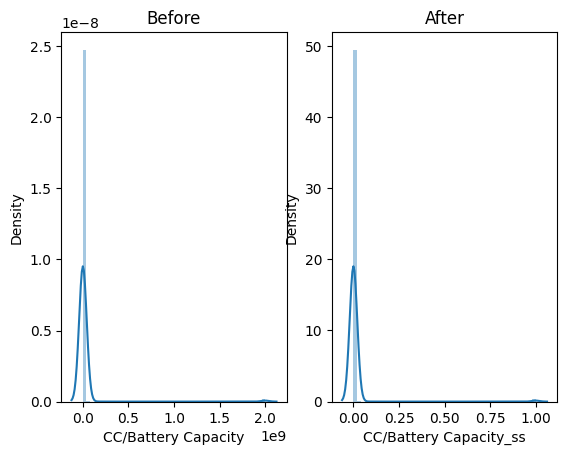

In [48]:
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["CC/Battery Capacity"])
plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["CC/Battery Capacity_ss"])
plt.show()

To remove duplicated row data.

In [49]:
dataset.shape

(1218, 14)

In [50]:
dataset.drop_duplicates(inplace=True)

In [51]:
dataset.shape

(1213, 14)

Here, the rows are shrinked. Therefore removing the duplicates.